(213, 160, 3)


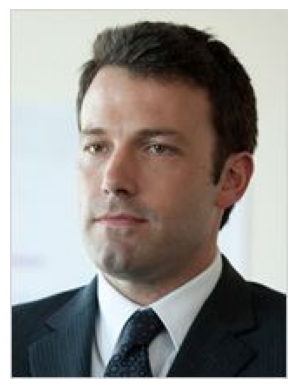

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def resize_nearest_neighbor(input_image, new_width, new_height):
    # Load the input image
    img = mpimg.imread(input_image)

    # Get the original image dimensions
    original_height, original_width, _ = img.shape

    # Create a new image with the desired dimensions
    resized_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    # Calculate scaling factors
    x_scale = original_width / new_width
    y_scale = original_height / new_height

    for y in range(new_height):
        for x in range(new_width):
            # Find the corresponding pixel in the original image using nearest-neighbor interpolation
            source_x = int(x * x_scale)
            source_y = int(y * y_scale)
            source_x = max(0, min(source_x, original_width - 1))
            source_y = max(0, min(source_y, original_height - 1))

            # Assign the pixel value from the original image to the resized image
            resized_image[y, x, :] = img[source_y, source_x, :]

    return resized_image

input_image = 'person.jpg'
new_width = 300
new_height = 400
resized_image = resize_nearest_neighbor(input_image, new_width, new_height)
original_image = mpimg.imread(input_image)
print(original_image.shape)
plt.imshow(original_image)
plt.axis('off')
plt.show()

(400, 300, 3)


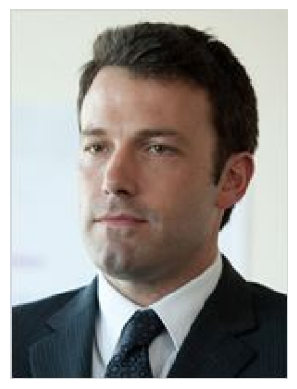

In [24]:
print(resized_image.shape)
plt.imshow(resized_image)

plt.axis('off')
plt.show()
mpimg.imsave('output_image.jpg', resized_image)


In [26]:
def linear_interpolation(x1, y1, x2, y2, x):
    # Calculate the slope (m)
    m = (y2 - y1) / (x2 - x1)

    # Calculate the estimated value (y) using linear interpolation
    y = y1 + (x - x1) * m

    return y

# Example usage:
x1 = 2
y1 = 5
x2 = 7
y2 = 15
x = 4

result = linear_interpolation(x1, y1, x2, y2, x)
print(f"Estimated value at x = {x}: {result}")

Estimated value at x = 4: 9.0


# Bilinear Interpolation

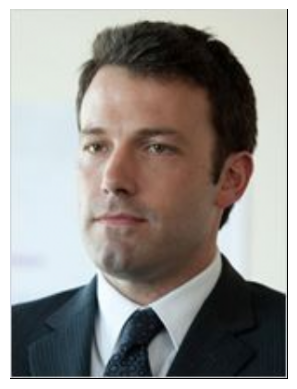

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def bilinear_interpolation(image, x, y):
    x0 = int(x)
    x1 = x0 + 1
    y0 = int(y)
    y1 = y0 + 1

    if x0 < 0 or x1 >= image.shape[1] or y0 < 0 or y1 >= image.shape[0]:
        return 0  # Return 0 for out-of-bounds values

    dx = x - x0
    dy = y - y0

    interpolated_value = (1 - dx) * (1 - dy) * image[y0, x0] + dx * (1 - dy) * image[y0, x1] + (1 - dx) * dy * image[y1, x0] + dx * dy * image[y1, x1]

    return interpolated_value

def resize_bilinear(input_image, new_width, new_height):
    img = mpimg.imread(input_image)

    
    resized_image = np.zeros((new_height, new_width, img.shape[2]), dtype=np.uint8)

    # Calculate scaling factors
    x_scale = img.shape[1] / new_width
    y_scale = img.shape[0] / new_height

    for y in range(new_height):
        for x in range(new_width):
            # Calculate the corresponding coordinates in the original image
            source_x = x * x_scale
            source_y = y * y_scale

            # Perform bilinear interpolation to estimate the pixel value
            interpolated_value = bilinear_interpolation(img, source_x, source_y)

            # Assign the interpolated value to the resized image
            resized_image[y, x, :] = interpolated_value

    return resized_image

input_image = 'person.jpg'
new_width = 300  # New width
new_height = 400  # New height
resized_image = resize_bilinear(input_image, new_width, new_height)

# Display the resized image using matplotlib
plt.imshow(resized_image)
plt.axis('off')
plt.show()

# Save the resized image
mpimg.imsave('bilinear_output_image.jpg', resized_image)

# Bicubic

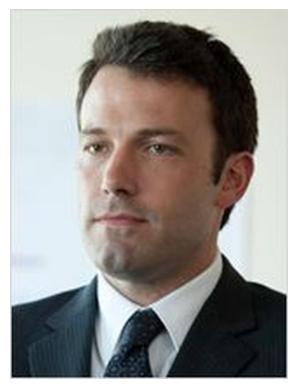

In [36]:
import numpy as np
from scipy.ndimage import zoom
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the input image
input_image = mpimg.imread('person.jpg')

# Define the scaling factors
scaling_factor = 2  # Scale up by a factor of 2

# Use bicubic interpolation to resize the image
resized_image = zoom(input_image, zoom=(scaling_factor, scaling_factor, 1), order=3)  # order=3 corresponds to bicubic interpolation

# Display the resized image using matplotlib
plt.imshow(resized_image)
plt.axis('off')
plt.show()

# Save the resized image
mpimg.imsave('bicubic_output_image.jpg', resized_image)


In [44]:
import cv2
import numpy as np
import math
import sys, time

# Interpolation kernel
def u(s,a):
    if (abs(s) >=0) & (abs(s) <=1):
        return (a+2)*(abs(s)**3)-(a+3)*(abs(s)**2)+1
    elif (abs(s) > 1) & (abs(s) <= 2):
        return a*(abs(s)**3)-(5*a)*(abs(s)**2)+(8*a)*abs(s)-4*a
    return 0

#Paddnig
def padding(img,H,W,C):
    zimg = np.zeros((H+4,W+4,C))
    zimg[2:H+2,2:W+2,:C] = img
    #Pad the first/last two col and row
    zimg[2:H+2,0:2,:C]=img[:,0:1,:C]
    zimg[H+2:H+4,2:W+2,:]=img[H-1:H,:,:]
    zimg[2:H+2,W+2:W+4,:]=img[:,W-1:W,:]
    zimg[0:2,2:W+2,:C]=img[0:1,:,:C]
    #Pad the missing eight points
    zimg[0:2,0:2,:C]=img[0,0,:C]
    zimg[H+2:H+4,0:2,:C]=img[H-1,0,:C]
    zimg[H+2:H+4,W+2:W+4,:C]=img[H-1,W-1,:C]
    zimg[0:2,W+2:W+4,:C]=img[0,W-1,:C]
    return zimg

# https://github.com/yunabe/codelab/blob/master/misc/terminal_progressbar/progress.py
def get_progressbar_str(progress):
    END = 170
    MAX_LEN = 30
    BAR_LEN = int(MAX_LEN * progress)
    return ('Progress:[' + '=' * BAR_LEN +
            ('>' if BAR_LEN < MAX_LEN else '') +
            ' ' * (MAX_LEN - BAR_LEN) +
            '] %.1f%%' % (progress * 100.))

# Bicubic operation
def bicubic(img, ratio, a):
    #Get image size
    H,W,C = img.shape

    img = padding(img,H,W,C)
    #Create new image
    dH = math.floor(H*ratio)
    dW = math.floor(W*ratio)
    dst = np.zeros((dH, dW, 3))

    h = 1/ratio

    print('Start bicubic interpolation')
    print('It will take a little while...')
    inc = 0
    for c in range(C):
        for j in range(dH):
            for i in range(dW):
                x, y = i * h + 2 , j * h + 2

                x1 = 1 + x - math.floor(x)
                x2 = x - math.floor(x)
                x3 = math.floor(x) + 1 - x
                x4 = math.floor(x) + 2 - x

                y1 = 1 + y - math.floor(y)
                y2 = y - math.floor(y)
                y3 = math.floor(y) + 1 - y
                y4 = math.floor(y) + 2 - y

                mat_l = np.matrix([[u(x1,a),u(x2,a),u(x3,a),u(x4,a)]])
                mat_m = np.matrix([[img[int(y-y1),int(x-x1),c],img[int(y-y2),int(x-x1),c],img[int(y+y3),int(x-x1),c],img[int(y+y4),int(x-x1),c]],
                                   [img[int(y-y1),int(x-x2),c],img[int(y-y2),int(x-x2),c],img[int(y+y3),int(x-x2),c],img[int(y+y4),int(x-x2),c]],
                                   [img[int(y-y1),int(x+x3),c],img[int(y-y2),int(x+x3),c],img[int(y+y3),int(x+x3),c],img[int(y+y4),int(x+x3),c]],
                                   [img[int(y-y1),int(x+x4),c],img[int(y-y2),int(x+x4),c],img[int(y+y3),int(x+x4),c],img[int(y+y4),int(x+x4),c]]])
                mat_r = np.matrix([[u(y1,a)],[u(y2,a)],[u(y3,a)],[u(y4,a)]])
                dst[j, i, c] = np.dot(np.dot(mat_l, mat_m),mat_r)

                # Print progress
                inc = inc + 1
                sys.stderr.write('\r\033[K' + get_progressbar_str(inc/(C*dH*dW)))
                sys.stderr.flush()
    sys.stderr.write('\n')
    sys.stderr.flush()
    return dst

# Read image
img = cv2.imread('person.jpg')

# Scale factor
ratio = 2
# Coefficient
a = -1/2

dst = bicubic(img, ratio, a)
print('Completed!')
cv2.imwrite('new_persong.jpg', dst)

Progress:[>                              ] 0.0%

Start bicubic interpolation
It will take a little while...


Progress:[============================>  ] 95.3%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Progress:[=============================> ] 96.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Progress:[=============================> ] 98.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate

Completed!


True

In [2]:
import numpy as np

def quadratic_interpolation(x0, y0, x1, y1, x2, y2, x):
    # Calculate the coefficients a, b, and c of the quadratic function
    a = ((y2 - y0) / ((x2 - x0) * (x2 - x1))) - ((y1 - y0) / ((x1 - x0) * (x2 - x1)))
    b = (y1 - y0 - a * (x1 - x0)**2) / (x1 - x0)
    c = y0 - a * x0**2 - b * x0

    # Calculate the estimated value (y) for the given x using the quadratic function
    y = a * x**2 + b * x + c

    return y

# Example usage:
x0 = 1
y0 = 2
x1 = 3
y1 = 8
x2 = 5
y2 = 18
x = 4

result = quadratic_interpolation(x0, y0, x1, y1, x2, y2, x)
print(f"Estimated value at x = {x}: {result}")

Estimated value at x = 4: 15.5


In [5]:
import numpy as np
from PIL import Image

def quadratic_interpolation_1D(p0, p1, p2, t):
    return 0.5 * ((2 * p1) + (p2 - p0) * t + (p0 - 2 * p1 + p2) * t**2)

def resize_quadratic_interpolation(input_image, new_width, new_height):
    img = Image.open(input_image)
    resized_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    x_scale = img.width / new_width
    y_scale = img.height / new_height

    for y in range(new_height):
        for x in range(new_width):
            source_x = x * x_scale
            source_y = y * y_scale

            x0 = int(source_x)
            x1 = min(x0 + 1, img.width - 1)
            x2 = min(x0 + 2, img.width - 1)

            y0 = int(source_y)
            y1 = min(y0 + 1, img.height - 1)
            y2 = min(y0 + 2, img.height - 1)

            dx = source_x - x0
            dy = source_y - y0

            interpolated_color = [0, 0, 0]  # Initialize with zeros for R, G, B

            for channel in range(3):  # Iterate over R, G, B channels
                interpolated_x = quadratic_interpolation_1D(img.getpixel((x0, y0))[channel], img.getpixel((x1, y0))[channel], img.getpixel((x2, y0))[channel], dx)
                interpolated_y = quadratic_interpolation_1D(img.getpixel((x0, y0))[channel], img.getpixel((x0, y1))[channel], img.getpixel((x0, y2))[channel], dy)
                interpolated_color[channel] = int(0.5 * (interpolated_x + interpolated_y))

            resized_image[y, x] = tuple(interpolated_color)

    return Image.fromarray(resized_image)

input_image = 'person.jpg'
new_width = 300  # New width
new_height = 400  # New height
resized_image = resize_quadratic_interpolation(input_image, new_width, new_height)
resized_image.show()
resized_image.save('quadratic_output_image.jpg')


In [ ]:
#https://www.kaggle.com/code/ritikniaj/mnistcnn
#https://www.kaggle.com/code/ritikniaj/gan-for-image